In [1]:
import numpy as np
from matplotlib import pyplot as plt
from whiteGPT import word2vec

In [2]:
vec_file_path = 'wiki-news-300d-1M.vec'
vectors = word2vec.load_vectors(vec_file_path)

In [3]:
## コサイン類似度を計算する関数
def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    norm = norm1 * norm2
    similarity = dot / norm

    return similarity

In [4]:
## 例
vector1 = np.array([0.1, 0.2, 0.3])
vector2 = np.array([-0.3,-0.2,-0.1])

similarity = cosine_similarity(vector1, vector2)
print("Cosine Similarity:", similarity)

Cosine Similarity: -0.7142857142857143


In [5]:
## paperとbananaのコサイン類似度を計算
vector1 = vectors['paper']
vector2 = vectors['banana']
cosine_similarity(vector1, vector2)

0.38695389573492

In [6]:
## travelと他の単語のコサイン類似度を計算
vector1 = vectors['travel']

similarities = []

for key, vector2 in vectors.items():
    similarity = cosine_similarity(vector1, vector2)

    # 類似度が0.6超のベクトルを収集
    if similarity > 0.6 :
        similarities.append([similarity, key] )

In [7]:
# 収集したベクトルの数
print(len(similarities))

10


In [8]:
# 類似度の降順で並べ替え
similarities.sort(reverse=True)
# 先頭n件の表示
similarities[:10]

[[1.0000000000000002, 'travel'],
 [0.7603609554648686, 'traveling'],
 [0.7347434884597056, 'travelling'],
 [0.7255005534370904, 'Travel'],
 [0.6882540914094871, 'travels'],
 [0.6665211463234465, 'trip'],
 [0.6391544957330978, 'trips'],
 [0.6144248363104245, 'journeys'],
 [0.6131116626102254, 'traveler'],
 [0.6026881236192687, 'journey']]

### コサイン類似度の計算

王 - 男 + 女 = 女王？

In [9]:
# king - man + woman
king = vectors['king']
queen = vectors['queen']
man = vectors['man']
woman = vectors['woman']
cosine_similarity(king - man + woman, queen)

0.7673766998589789

夏 - 暑い + 寒い = 冬？

In [10]:
hot = vectors['hot']
cold = vectors['cold']
summer = vectors['summer']
winter = vectors['winter']


In [11]:
# hot と cold
cosine_similarity(hot, cold)

0.7127844651783529

In [12]:
# hot と summer
cosine_similarity(hot, summer)

0.4838471573685533

In [13]:
# summer と winter
cosine_similarity(summer, winter)

0.8376738582256029

In [14]:
# (summer - hot + cold)と winter
cosine_similarity(summer - hot + cold, winter)

0.7816870725903827

<BarContainer object of 300 artists>

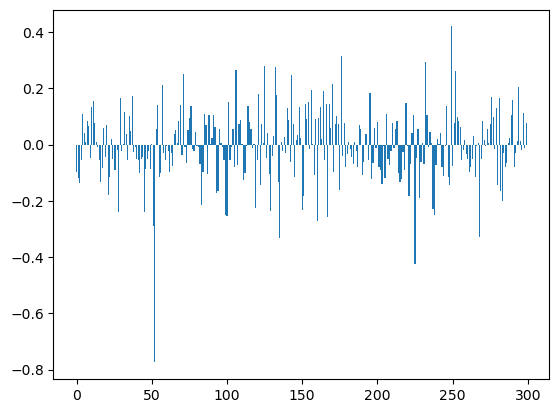

In [15]:
# `hot`ベクトル
labels = np.arange(300)
plt.bar(labels, hot)

### 特徴ベクトル

In [16]:
## 特徴ベクトルを作成する関数
def create_feature_vectors(vectors, keys):

    feature_vectors = np.zeros(300)

    for key in keys:
        feature_vectors += vectors[key]

    feature_vectors /= len(keys)

    return feature_vectors

In [17]:
## 暑さの特徴ベクトルを見つける
# 暑い（熱い）単語
keys_hot = ['hot', 'boiling', 'beach','heat', 'August', 'burn','swimming']

# 寒い（冷たい）単語
keys_cold = ['cold', 'ice', 'winter', 'frozen', 'water','snow', 'coat','skiing']

# 特徴ベクトルの作成
feature_hot = create_feature_vectors(vectors, keys_hot)
feature_cold = create_feature_vectors(vectors, keys_cold)

In [18]:
# (summer - 暑さの特徴 + 寒さの特徴)と winter
cosine_similarity(summer - feature_hot + feature_cold, winter)

0.8831522640795195

In [19]:
# 温度の特徴ベクトル
temperature = feature_hot - feature_cold

In [20]:
# 本来の暑さと関係がない（直交ベクトル）
cosine_similarity(temperature , hot)

0.14435782506465705

<BarContainer object of 300 artists>

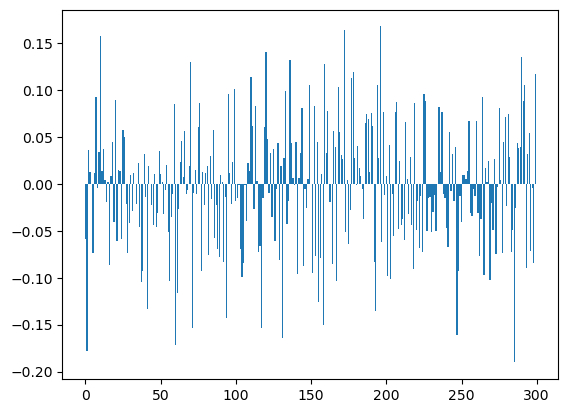

In [21]:
# 温度の特徴ベクトルを可視化
labels = np.arange(300)
plt.bar(labels, temperature)

In [22]:
## 類似する項目を検索する関数
def search_similar_item(vectors, reference_vector):
    max_similar_key = None # 最大の類似キー
    max_similarity = -float('inf')  # 最大の類似度
    similarity_list = {} # 類似度の一覧

    for i, key in enumerate(vectors):

        similarity = cosine_similarity(reference_vector, vectors[key])

        if similarity > 0.6:
            similarity_list[key] = similarity

        if max_similarity < similarity:
            max_similarity = similarity
            max_similar_key = key

    return max_similar_key, max_similarity, similarity_list

In [23]:
# summer - feature_hot + feature_cold
reference_vector = summer - feature_hot + feature_cold
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [24]:
key

'winter'

In [26]:
## 地名の例
tokyo  = vectors['Tokyo']
france = vectors['France']
paris = vectors['Paris']
japan = vectors['Japan']

In [27]:
# コサイン類似度
cosine_similarity(tokyo - japan + france, paris )

0.8581427034450737

In [28]:
# tokyo - japan + france, paris
reference_vector = tokyo - japan + france
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [29]:
key

'Paris'